In [1]:
import numpy as np

from cleanplots import * 

In [2]:
psf_names = ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
psf_names_nice = ['One Lenslet', 'Two Lenslet', 'Three Lenslet', 'Four Lenslet', 'Five Lenslet', 'Six Lenslet', 'Seven Lenslet', 'Eight Lenslet', 'Nine Lenslet']

# set eligible bead sparsity levels
sparsity_levels = [0.008, 0.009, 0.01, 0.012, 0.013, 0.014, 0.015, 0.02, 0.025, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15]
# set dataset size 
num_x = 96
num_y = 96
num_bead_imgs = 50000
# MI estimator parameters 
patch_size = 32
num_patches = 10000
val_set_size = 1000
test_set_size = 1500 
num_samples = 8
learning_rate = 1e-3
num_iters_per_epoch = 500
patience_val = 20
mean_photon_count = 100 

In [3]:
figure_dir = '/home/lakabuli/workspace/LenslessInfoDesign/figures/'

### Load Object TCs - use full object TCs

In [4]:
tc_dir = '/home/lakabuli/workspace/LenslessInfoDesign/tradeoff_analysis/tc_values/bead_tc_values/'

{'full': [np.float32(1.3588215), np.float32(0.016813619)], 'crop': [np.float32(1.3685265), np.float32(0.13535927)]}
{'full': [np.float32(1.3179525), np.float32(0.016410327)], 'crop': [np.float32(1.3239619), np.float32(0.12261661)]}
{'full': [np.float32(1.278587), np.float32(0.01606197)], 'crop': [np.float32(1.2817489), np.float32(0.111764856)]}
{'full': [np.float32(1.2196074), np.float32(0.015450943)], 'crop': [np.float32(1.2193334), np.float32(0.09765958)]}
{'full': [np.float32(1.1944333), np.float32(0.015201833)], 'crop': [np.float32(1.1928512), np.float32(0.092288256)]}
{'full': [np.float32(1.1691554), np.float32(0.014943333)], 'crop': [np.float32(1.1667233), np.float32(0.087159514)]}
{'full': [np.float32(1.1484342), np.float32(0.0147269275)], 'crop': [np.float32(1.1453289), np.float32(0.083182015)]}
{'full': [np.float32(1.0641085), np.float32(0.013903436)], 'crop': [np.float32(1.0588373), np.float32(0.06842167)]}
{'full': [np.float32(1.003684), np.float32(0.013129478)], 'crop': [np

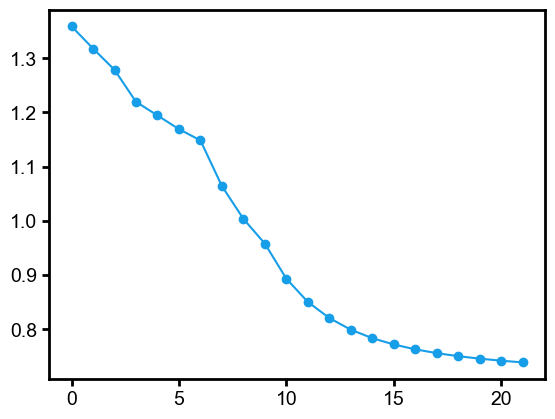

In [5]:
object_tcs = []
for sparsity in sparsity_levels: 
    object_path = tc_dir + 'tamura_values_object_{}_sparsity_{}_photons.npy'.format(sparsity, mean_photon_count)
    object_tc = np.load(object_path, allow_pickle=True).item()
    tamura_value = object_tc['full'][0]
    object_tcs.append(tamura_value)
    print(object_tc)
object_tcs = np.array(object_tcs)
plt.plot(object_tcs, '-o')

In [6]:
print(sparsity_levels)
print(object_tcs)

[0.008, 0.009, 0.01, 0.012, 0.013, 0.014, 0.015, 0.02, 0.025, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15]
[1.3588215  1.3179525  1.278587   1.2196074  1.1944333  1.1691554
 1.1484342  1.0641085  1.003684   0.957902   0.8931782  0.8503194
 0.82055783 0.7990492  0.78345203 0.77175367 0.7628077  0.7557686
 0.7501579  0.74558204 0.7418257  0.7386448 ]


### Load Measurement TCs - use noisy patch TC

In [7]:
tc_dir = '/home/lakabuli/workspace/LenslessInfoDesign/tradeoff_analysis/tc_values/bead_tc_values/'

In [8]:
sparsities_and_tcs = []
for sparsity in sparsity_levels:
    tc_across_psfs = [] 
    for psf in psf_names: 
        tc_path = tc_dir + 'tamura_values_{}_sparsity_{}_photons_{}_psf.npy'.format(sparsity, mean_photon_count, psf)
        tc = np.load(tc_path, allow_pickle=True).item()
        tc_value = tc['patch_noisy'][0] 
        print("TC value for sparsity {} and PSF {} is {}".format(sparsity, psf, tc_value))
        tc_across_psfs.append(tc_value)
    sparsities_and_tcs.append(tc_across_psfs)
sparsities_and_tcs = np.array(sparsities_and_tcs)

TC value for sparsity 0.008 and PSF one is 1.2512352466583252
TC value for sparsity 0.008 and PSF two is 1.0381217002868652
TC value for sparsity 0.008 and PSF three is 0.9375264644622803
TC value for sparsity 0.008 and PSF four is 0.8761621117591858
TC value for sparsity 0.008 and PSF five is 0.8368374705314636
TC value for sparsity 0.008 and PSF six is 0.8112269043922424
TC value for sparsity 0.008 and PSF seven is 0.793556809425354
TC value for sparsity 0.008 and PSF eight is 0.7811248302459717
TC value for sparsity 0.008 and PSF nine is 0.7720272541046143
TC value for sparsity 0.009 and PSF one is 1.2107932567596436
TC value for sparsity 0.009 and PSF two is 1.0062150955200195
TC value for sparsity 0.009 and PSF three is 0.9110683798789978
TC value for sparsity 0.009 and PSF four is 0.854861319065094
TC value for sparsity 0.009 and PSF five is 0.8199069499969482
TC value for sparsity 0.009 and PSF six is 0.7976188659667969
TC value for sparsity 0.009 and PSF seven is 0.782529056072

### Load MI sweeps

In [9]:
mi_dir = '/home/lakabuli/workspace/LenslessInfoDesign/tradeoff_analysis/mi_estimates/bead_mi_estimates/'

In [10]:
sparsities_and_mis = []
sparsities_and_lowers = []
sparsities_and_uppers = []
for sparsity in sparsity_levels:
    mi_across_psfs = []
    lowers_across_psfs = []
    uppers_across_psfs = []
    for psf in psf_names:
        mi_path = mi_dir + 'pixelcnn_mi_estimate_{}_sparsity_{}_photons_{}_psf_{}_lr_{}_patience_{}_steps_per_epoch.npy'.format(sparsity, mean_photon_count, psf, learning_rate, patience_val, num_iters_per_epoch)
        mi_estimates = np.load(mi_path)
        print('MI estimate for sparsity level {} and PSF {} is {}'.format(sparsity, psf, mi_estimates))
        best_mi_value, best_mi_idx = np.min(mi_estimates[0]), np.argmin(mi_estimates[0])
        best_mi_lower_bound = mi_estimates[1][best_mi_idx]
        best_mi_upper_bound = mi_estimates[2][best_mi_idx]
        mi_across_psfs.append(best_mi_value)
        lowers_across_psfs.append(best_mi_lower_bound)
        uppers_across_psfs.append(best_mi_upper_bound)
    sparsities_and_mis.append(mi_across_psfs)
    sparsities_and_lowers.append(lowers_across_psfs)
    sparsities_and_uppers.append(uppers_across_psfs)
sparsities_and_mis = np.array(sparsities_and_mis)
sparsities_and_lowers = np.array(sparsities_and_lowers)
sparsities_and_uppers = np.array(sparsities_and_uppers)

MI estimate for sparsity level 0.008 and PSF one is [[0.13965395 0.12995729 0.14409908 0.14456669 0.14479804]
 [0.12792395 0.11851276 0.1311356  0.13223194 0.13081112]
 [0.15075124 0.14176928 0.15512936 0.15691185 0.15726168]]
MI estimate for sparsity level 0.008 and PSF two is [[0.19789914 0.18960537 0.21175408 0.21215511 0.20783157]
 [0.18480881 0.17585457 0.19530788 0.19854197 0.19247809]
 [0.21123596 0.20331467 0.22529164 0.22524461 0.22087041]]
MI estimate for sparsity level 0.008 and PSF three is [[0.24447953 0.23576413 0.25162023 0.25801794 0.249074  ]
 [0.2312817  0.2228424  0.2359891  0.24475816 0.2321302 ]
 [0.26044536 0.24932305 0.26467242 0.27178902 0.26139063]]
MI estimate for sparsity level 0.008 and PSF four is [[0.31904059 0.31376181 0.33159352 0.33875552 0.32541412]
 [0.30491413 0.30047342 0.3165733  0.32514097 0.30785848]
 [0.33342867 0.3282739  0.3447946  0.35393109 0.33806141]]
MI estimate for sparsity level 0.008 and PSF five is [[0.37602783 0.37274255 0.38624252 0

### Plot MI vs Object Sparsity: Fig. 2b

In [11]:
inferno = plt.cm.get_cmap('inferno', 11) # max photon count value, using each tick point smoothly gives a better color gradient that isn't uniform
colors = [inferno(i) for i in [1, 2, 3, 4, 5, 6, 7, 8, 9]]

axis_label_fontsize = 21
title_fontsize = 23
tick_fontsize = 19
legend_fontsize = 16
star_size = 18
error_bar_transparency = 0.15

/tmp/ipykernel_3835214/2299809711.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  inferno = plt.cm.get_cmap('inferno', 11) # max photon count value, using each tick point smoothly gives a better color gradient that isn't uniform


Sensor sparsity for PSF One Lenslet is 0.7458316087722778 and MI is 0.6441008111375326
Sensor sparsity for PSF Two Lenslet is 0.747905969619751 and MI is 0.6185470416171068
Sensor sparsity for PSF Three Lenslet is 0.749660313129425 and MI is 0.6128886801897452
Sensor sparsity for PSF Four Lenslet is 0.7500752806663513 and MI is 0.6222505501828904
Sensor sparsity for PSF Five Lenslet is 0.7482747435569763 and MI is 0.6201035238935614
Sensor sparsity for PSF Six Lenslet is 0.7494173049926758 and MI is 0.6175077233617201
Sensor sparsity for PSF Seven Lenslet is 0.7530527710914612 and MI is 0.6130213367846001
Sensor sparsity for PSF Eight Lenslet is 0.7508292198181152 and MI is 0.6132365340384939
Sensor sparsity for PSF Nine Lenslet is 0.7494759559631348 and MI is 0.6045738667241709


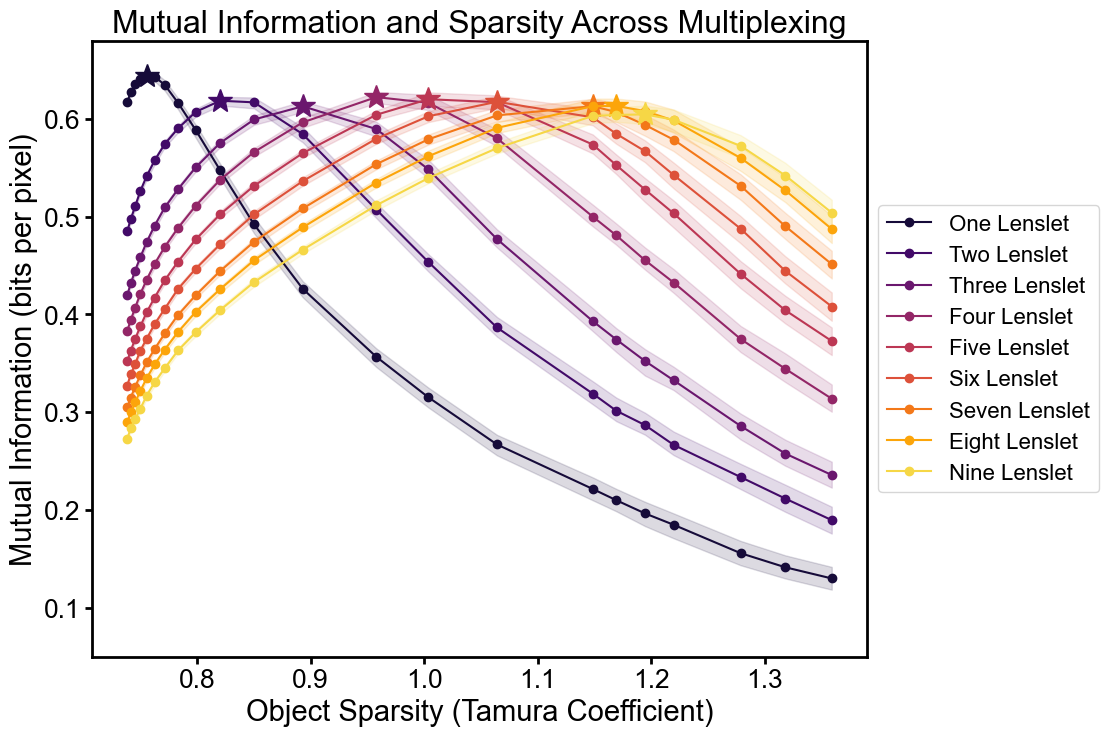

In [12]:
plt.figure(figsize=(10, 8))
for psf_idx in range(9):
    plt.plot(object_tcs, sparsities_and_mis[:, psf_idx], '-o', label=psf_names_nice[psf_idx], color=colors[psf_idx])
    plt.fill_between(object_tcs, sparsities_and_lowers[:, psf_idx], sparsities_and_uppers[:, psf_idx], alpha=error_bar_transparency, color=colors[psf_idx])
    y_coord_idx = np.argmax(sparsities_and_mis[:, psf_idx])
    y_coord = sparsities_and_mis[y_coord_idx, psf_idx]
    x_coord = object_tcs[y_coord_idx]
    plt.plot(x_coord, y_coord, '*', color=colors[psf_idx], markersize=star_size)
    print("Sensor sparsity for PSF {} is {} and MI is {}".format(psf_names_nice[psf_idx], sparsities_and_tcs[y_coord_idx, psf_idx], y_coord))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=legend_fontsize)
plt.xlabel('Object Sparsity (Tamura Coefficient)', fontsize=axis_label_fontsize)
plt.ylabel('Mutual Information (bits per pixel)', fontsize=axis_label_fontsize)
plt.ylim([0.05, 0.68])
#plt.xlim([0.65, 1.39])
plt.xticks([0.8, 0.9, 1.0, 1.1, 1.2, 1.3], size=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)
plt.title("Mutual Information and Sparsity Across Multiplexing", size=title_fontsize)
plt.savefig(figure_dir + 'mi_vs_sparsity_2D.pdf', transparent=True, bbox_inches='tight')

### Plot of Object Sparsity vs. Measurement TC: Fig. 2c

Sensor sparsity for PSF One Lenslet is 0.7458316087722778 and MI is 0.6441008111375326
Sensor sparsity for PSF Two Lenslet is 0.747905969619751 and MI is 0.6185470416171068
Sensor sparsity for PSF Three Lenslet is 0.749660313129425 and MI is 0.6128886801897452
Sensor sparsity for PSF Four Lenslet is 0.7500752806663513 and MI is 0.6222505501828904
Sensor sparsity for PSF Five Lenslet is 0.7482747435569763 and MI is 0.6201035238935614
Sensor sparsity for PSF Six Lenslet is 0.7494173049926758 and MI is 0.6175077233617201
Sensor sparsity for PSF Seven Lenslet is 0.7530527710914612 and MI is 0.6130213367846001
Sensor sparsity for PSF Eight Lenslet is 0.7508292198181152 and MI is 0.6132365340384939
Sensor sparsity for PSF Nine Lenslet is 0.7494759559631348 and MI is 0.6045738667241709


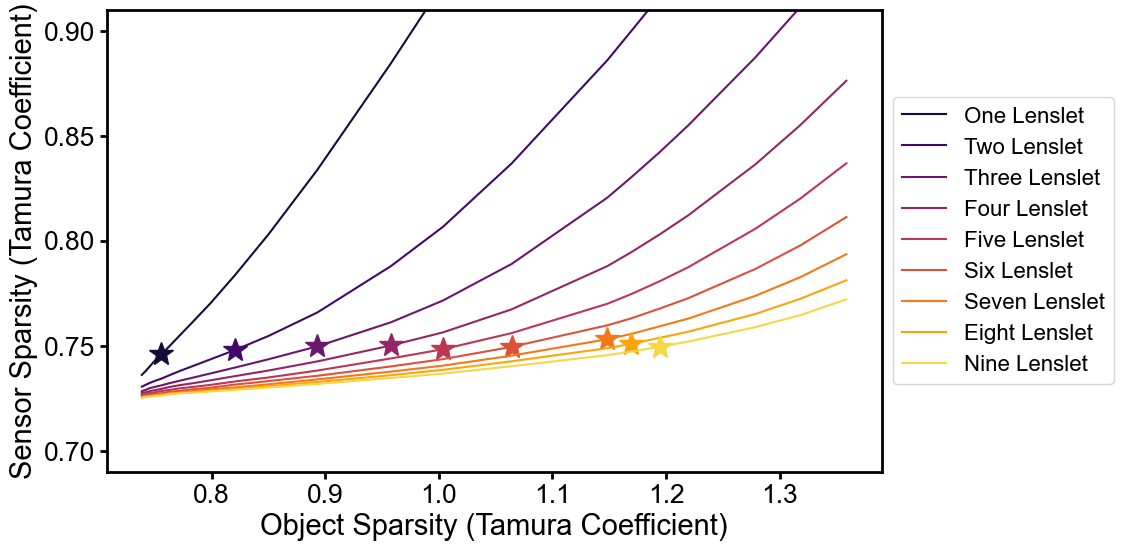

In [13]:
plt.figure(figsize=(10, 6))
# plot in terms of tamura 
for psf_idx in range(9):
    plt.plot(object_tcs, sparsities_and_tcs[:, psf_idx], label=psf_names_nice[psf_idx], color=colors[psf_idx])
    y_coord_idx = np.argmax(sparsities_and_mis[:, psf_idx])
    y_coord = sparsities_and_tcs[y_coord_idx, psf_idx]
    x_coord = object_tcs[y_coord_idx]
    plt.plot(x_coord, y_coord, '*', color=colors[psf_idx], markersize=star_size)
    print("Sensor sparsity for PSF {} is {} and MI is {}".format(psf_names_nice[psf_idx], y_coord, sparsities_and_mis[y_coord_idx, psf_idx]))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=legend_fontsize)
plt.xlabel('Object Sparsity (Tamura Coefficient)', fontsize=axis_label_fontsize)
plt.ylabel('Sensor Sparsity (Tamura Coefficient)', fontsize=axis_label_fontsize)
plt.xticks(fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)
plt.ylim([0.69, 0.91])
plt.yticks([0.7, 0.75, 0.8, 0.85, 0.9],size=tick_fontsize)
plt.xticks([0.8, 0.9, 1.0, 1.1, 1.2, 1.3], size=tick_fontsize)
plt.savefig(figure_dir + 'sensor_vs_object_sparsity_2D.pdf', transparent=True, bbox_inches='tight')

### Make measurement examples: Fig. 2d

In [14]:
import sys
sys.path.append('/home/lakabuli/workspace/LenslessInfoDesign/EncodingInformation/src/')
sys.path.append('/home/lakabuli/workspace/LenslessInfoDesign/EncodingInformation/lensless_imager/')
from lensless_helpers import *
from encoding_information.image_utils import add_noise


2025-12-23 18:19:01.034608: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1766542741.052074 3835214 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1766542741.057884 3835214 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Sensor sparsity for PSF One Lenslet is 0.7458316087722778 and MI is 0.6441008111375326
Object TC for PSF One Lenslet is 0.7557685971260071, sparsity level 0.11
Sensor sparsity for PSF Four Lenslet is 0.7500752806663513 and MI is 0.6222505501828904
Object TC for PSF Four Lenslet is 0.9579020142555237, sparsity level 0.03
Sensor sparsity for PSF Eight Lenslet is 0.7508292198181152 and MI is 0.6132365340384939
Object TC for PSF Eight Lenslet is 1.1691553592681885, sparsity level 0.014


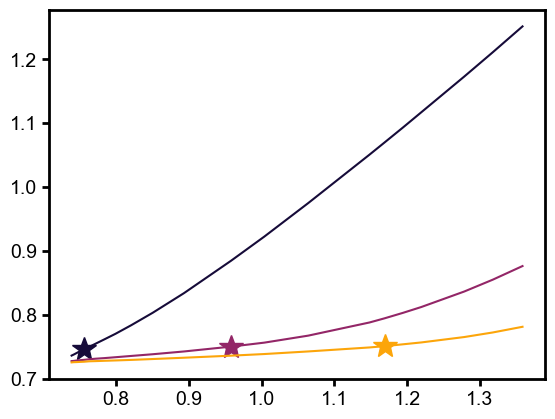

In [15]:
# set each of the ones manually: 
# one lens, four lens, and eight lenslet

psf_indices = [0, 3, 7] 
for psf_idx in psf_indices:
    plt.plot(object_tcs, sparsities_and_tcs[:, psf_idx], label=psf_names_nice[psf_idx], color=colors[psf_idx])
    y_coord_idx = np.argmax(sparsities_and_mis[:, psf_idx])
    y_coord = sparsities_and_tcs[y_coord_idx, psf_idx]
    x_coord = object_tcs[y_coord_idx]
    plt.plot(x_coord, y_coord, '*', color=colors[psf_idx], markersize=star_size)
    print("Sensor sparsity for PSF {} is {} and MI is {}".format(psf_names_nice[psf_idx], y_coord, sparsities_and_mis[y_coord_idx, psf_idx]))
    print("Object TC for PSF {} is {}, sparsity level {}".format(psf_names_nice[psf_idx], object_tcs[y_coord_idx], sparsity_levels[y_coord_idx]))

In [16]:
psfs_to_use = [load_single_lens_uniform(), load_four_lens_uniform(), load_eight_lens_uniform(), load_five_lens_uniform(), load_five_lens_uniform()]
object_sparsities_to_use = [0.11, 0.03, 0.014, 0.01, 0.14]
these_psf_names = ['one', 'four', 'eight', 'five_nonoptimal', 'five_nonoptimal']

In [17]:
num_x = 96
num_y = 96
num_bead_imgs = 50
seed_value = 42
bias = 10

Convolving images: 100%|██████████| 50/50 [00:00<00:00, 2755.21image/s]


0.7344175


Convolving images: 100%|██████████| 50/50 [00:00<00:00, 2742.27image/s]

0.7545255



Convolving images: 100%|██████████| 50/50 [00:00<00:00, 1551.83image/s]

0.7564533



Convolving images: 100%|██████████| 50/50 [00:00<00:00, 1535.44image/s]


0.8200426


Convolving images: 100%|██████████| 50/50 [00:00<00:00, 1726.92image/s]


0.73465055


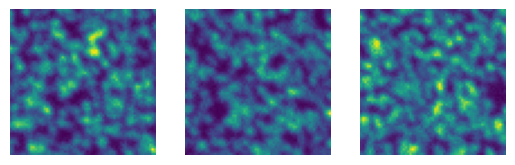

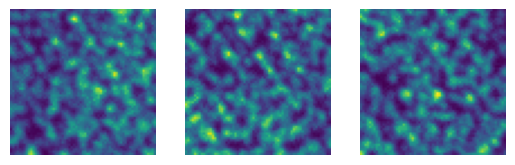

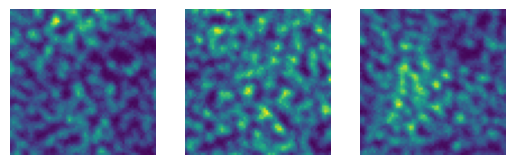

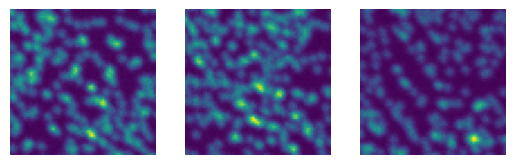

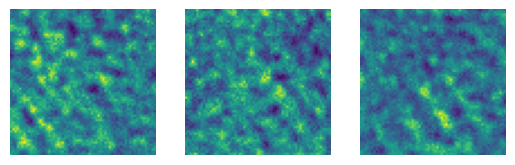

In [18]:
for psf_idx, psf in enumerate(psfs_to_use):
    sparsity = object_sparsities_to_use[psf_idx]
    dataset = np.zeros((num_bead_imgs, num_x, num_y))
    for i in range(dataset.shape[0]):
        dataset[i], num_points = make_bead_volume(sparsity, bead_width_scale=1, numx=num_x, numy=num_y) 
    dataset = dataset.astype(np.float32)
    dataset_photons = dataset / np.mean(dataset)
    dataset_photons = dataset_photons * mean_photon_count 
    psf_data = convolved_dataset(psf, dataset_photons)
    psf_data += bias
    psf_data_full_noise = add_noise(psf_data, seed=seed_value)
    print(compute_tamura(psf_data_full_noise[0]))
    
    plt.figure()
    plt.subplot(1, 3, 1)
    plt.imshow(psf_data_full_noise[0]) 
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.imshow(psf_data_full_noise[1])
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.imshow(psf_data_full_noise[2])
    plt.axis('off')
    plt.savefig(figure_dir + 'psf_{}_bead_{}_images.pdf'.format(these_psf_names[psf_idx], sparsity), transparent=True, bbox_inches='tight')

### Make new bead images: Fig. 2a

0.0 3527.0452
0.0 1311.5585
0.0 411.42096


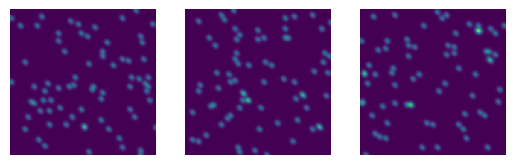

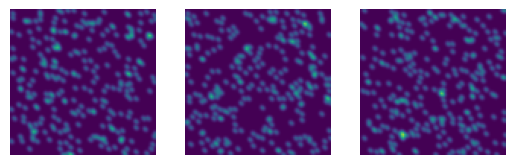

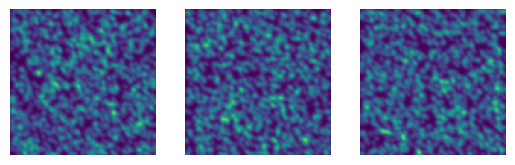

In [19]:
target_sparsities = [0.008, 0.03, 0.15] 
for sparsity in target_sparsities:
    dataset = np.zeros((num_bead_imgs, num_x, num_y))
    for i in range(dataset.shape[0]):
        dataset[i], num_points = make_bead_volume(sparsity, bead_width_scale=1, numx=num_x, numy=num_y)
    dataset = dataset.astype(np.float32)
    dataset_photons = dataset / np.mean(dataset)
    dataset_photons = dataset_photons * mean_photon_count
    max_val = np.max(dataset_photons)
    min_val = np.min(dataset_photons)
    print(min_val, max_val)
    # put examples and show images 
    plt.figure()
    plt.subplot(1, 3, 1)
    plt.imshow(dataset_photons[0], vmin=min_val, vmax=max_val)
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.imshow(dataset_photons[1], vmin=min_val, vmax=max_val)
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.imshow(dataset_photons[2], vmin=min_val, vmax=max_val)
    plt.axis('off')
    plt.savefig(figure_dir + '{}_sparsity_bead_images.pdf'.format(sparsity), transparent=True, bbox_inches='tight')
    